**Proposed hypothesis and approach**


We hypothesize that we can predict risk assessment 
response in the following dataset: https://www.kaggle.com/competitions/prudential-life-insurance-assessment/overview/description. The target variable is Response an ordinal variable measure of risk that has 8 levels. The dataset has over hundred variables describing attributes of life insurance applicant. Our approach is to run a multiclass classification machine learning model. We will examine the best features available within the model. Try the model with all features versus dropping the features. We will examine feature importance while running different models/ensemble learning to understand how the data set behaves and examine if the model can be used to predict and classify risk.


In [65]:
#Import libraries
import numpy as np #linear algerbra library
import pandas as pd #data processing
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
from imblearn.over_sampling import SMOTE #Oversampling
from sklearn.preprocessing import MinMaxScaler #Scaling data

In [67]:
#Importing the dataset
data = pd.read_csv('train.csv')

In [68]:
#checking dimensions of data
data.shape

(59381, 128)

In [69]:
#checking data
pd.set_option('display.max_columns', 500) 
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [70]:
#checking missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
Medical_History_10,58824,0.990620
Medical_History_32,58274,0.981358
Medical_History_24,55580,0.935990
Medical_History_15,44596,0.751015
Family_Hist_5,41811,0.704114
Family_Hist_3,34241,0.576632
Family_Hist_2,28656,0.482579
Insurance_History_5,25396,0.427679
Family_Hist_4,19184,0.323066
Employment_Info_6,10854,0.182786


In [71]:
#Imputation of missing data
data = data.fillna(data.mean())
data.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Id                     0
Product_Info_1         0
Product_Info_2         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_5    0
Insurance_History_7    0
Insurance_History_8    0
Insurance_History_9    0
Family_Hist_1          0
Family_Hist_2          0
Family_Hist_3          0
Family_Hist_4          0
Family_Hist_5          0
Medical_History_1      0
Medical_History_2      0


In EDA analysis we will explore, visualize the dataset further. The variables are in a normalized form. As we are dealing with a large amount of data. Data is grouped into four categories:  Categorical, Continuous, discrete and dummy variables. For KDE plot, these data distribution is used. KDE plots are density distribution plots. KDE plot is plotted for each feature and response is set as hue of the curve. Each features interaction with response is plotted on the KDE curve. The most significant KDE plot is the one with continuous variables as large variation is noticed between features and response. It is Ins_Age ,Ht ,Wt and BMI are the features that stand out. Most of the other category did not show any significant distribution as the curves closely overlapped between each response with no difference between each relative densities as it won’t help in predicting an applicant’s risk rating with each other. 


In [72]:
#Categorizing data for KDE plots

Categorical_Variables = ["Product_Info_1",  "Product_Info_3", "Product_Info_5", "Product_Info_6",\
                       "Product_Info_7", "Employment_Info_2", "Employment_Info_3", "Employment_Info_5", "InsuredInfo_1",\
                       "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7",\
                       "Insurance_History_1", "Insurance_History_2", "Insurance_History_3", "Insurance_History_4", "Insurance_History_7",\
                       "Insurance_History_8", "Insurance_History_9", "Family_Hist_1", "Medical_History_2", "Medical_History_3",\
                       "Medical_History_4", "Medical_History_5", "Medical_History_6", "Medical_History_7", "Medical_History_8",\
                       "Medical_History_9", "Medical_History_11", "Medical_History_12", "Medical_History_13", "Medical_History_14",\
                       "Medical_History_16", "Medical_History_17", "Medical_History_18", "Medical_History_19", "Medical_History_20",\
                       "Medical_History_21", "Medical_History_22", "Medical_History_23", "Medical_History_25", "Medical_History_26",\
                       "Medical_History_27", "Medical_History_28", "Medical_History_29", "Medical_History_30", "Medical_History_31",\
                       "Medical_History_33", "Medical_History_34", "Medical_History_35", "Medical_History_36", "Medical_History_37",\
                       "Medical_History_38", "Medical_History_39", "Medical_History_40", "Medical_History_41"]
#Continuous Variables
Continuous_Variables = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI",
                      "Employment_Info_1", "Employment_Info_4", "Employment_Info_6",
                      "Insurance_History_5", "Family_Hist_2", "Family_Hist_3", "Family_Hist_4", "Family_Hist_5"]
#Discrete Variables
Discrete_Variables = ["Medical_History_1", "Medical_History_10", "Medical_History_15", "Medical_History_24", "Medical_History_32"]
#Dummy_Variables["Medical_Keyword_{}".format(i) for i in range(1, 48)]
Dummy_Variables = ["Medical_Keyword_1","Medical_Keyword_2","Medical_Keyword_3","Medical_Keyword_4","Medical_Keyword_5","Medical_Keyword_6",\
                   "Medical_Keyword_7","Medical_Keyword_8","Medical_Keyword_9","Medical_Keyword_10","Medical_Keyword_11","Medical_Keyword_12",\
                   "Medical_Keyword_13","Medical_Keyword_14","Medical_Keyword_15","Medical_Keyword_16","Medical_Keyword_17","Medical_Keyword_18",\
                   "Medical_Keyword_19","Medical_Keyword_20","Medical_Keyword_21","Medical_Keyword_22","Medical_Keyword_23","Medical_Keyword_24",\
                   "Medical_Keyword_25","Medical_Keyword_26","Medical_Keyword_27","Medical_Keyword_28","Medical_Keyword_29","Medical_Keyword_30",\
                   "Medical_Keyword_31","Medical_Keyword_32","Medical_Keyword_33","Medical_Keyword_34","Medical_Keyword_35","Medical_Keyword_36",\
                   "Medical_Keyword_37","Medical_Keyword_38","Medical_Keyword_39","Medical_Keyword_40","Medical_Keyword_41","Medical_Keyword_42",\
                   "Medical_Keyword_43","Medical_Keyword_44","Medical_Keyword_45","Medical_Keyword_46","Medical_Keyword_47","Medical_Keyword_48"]


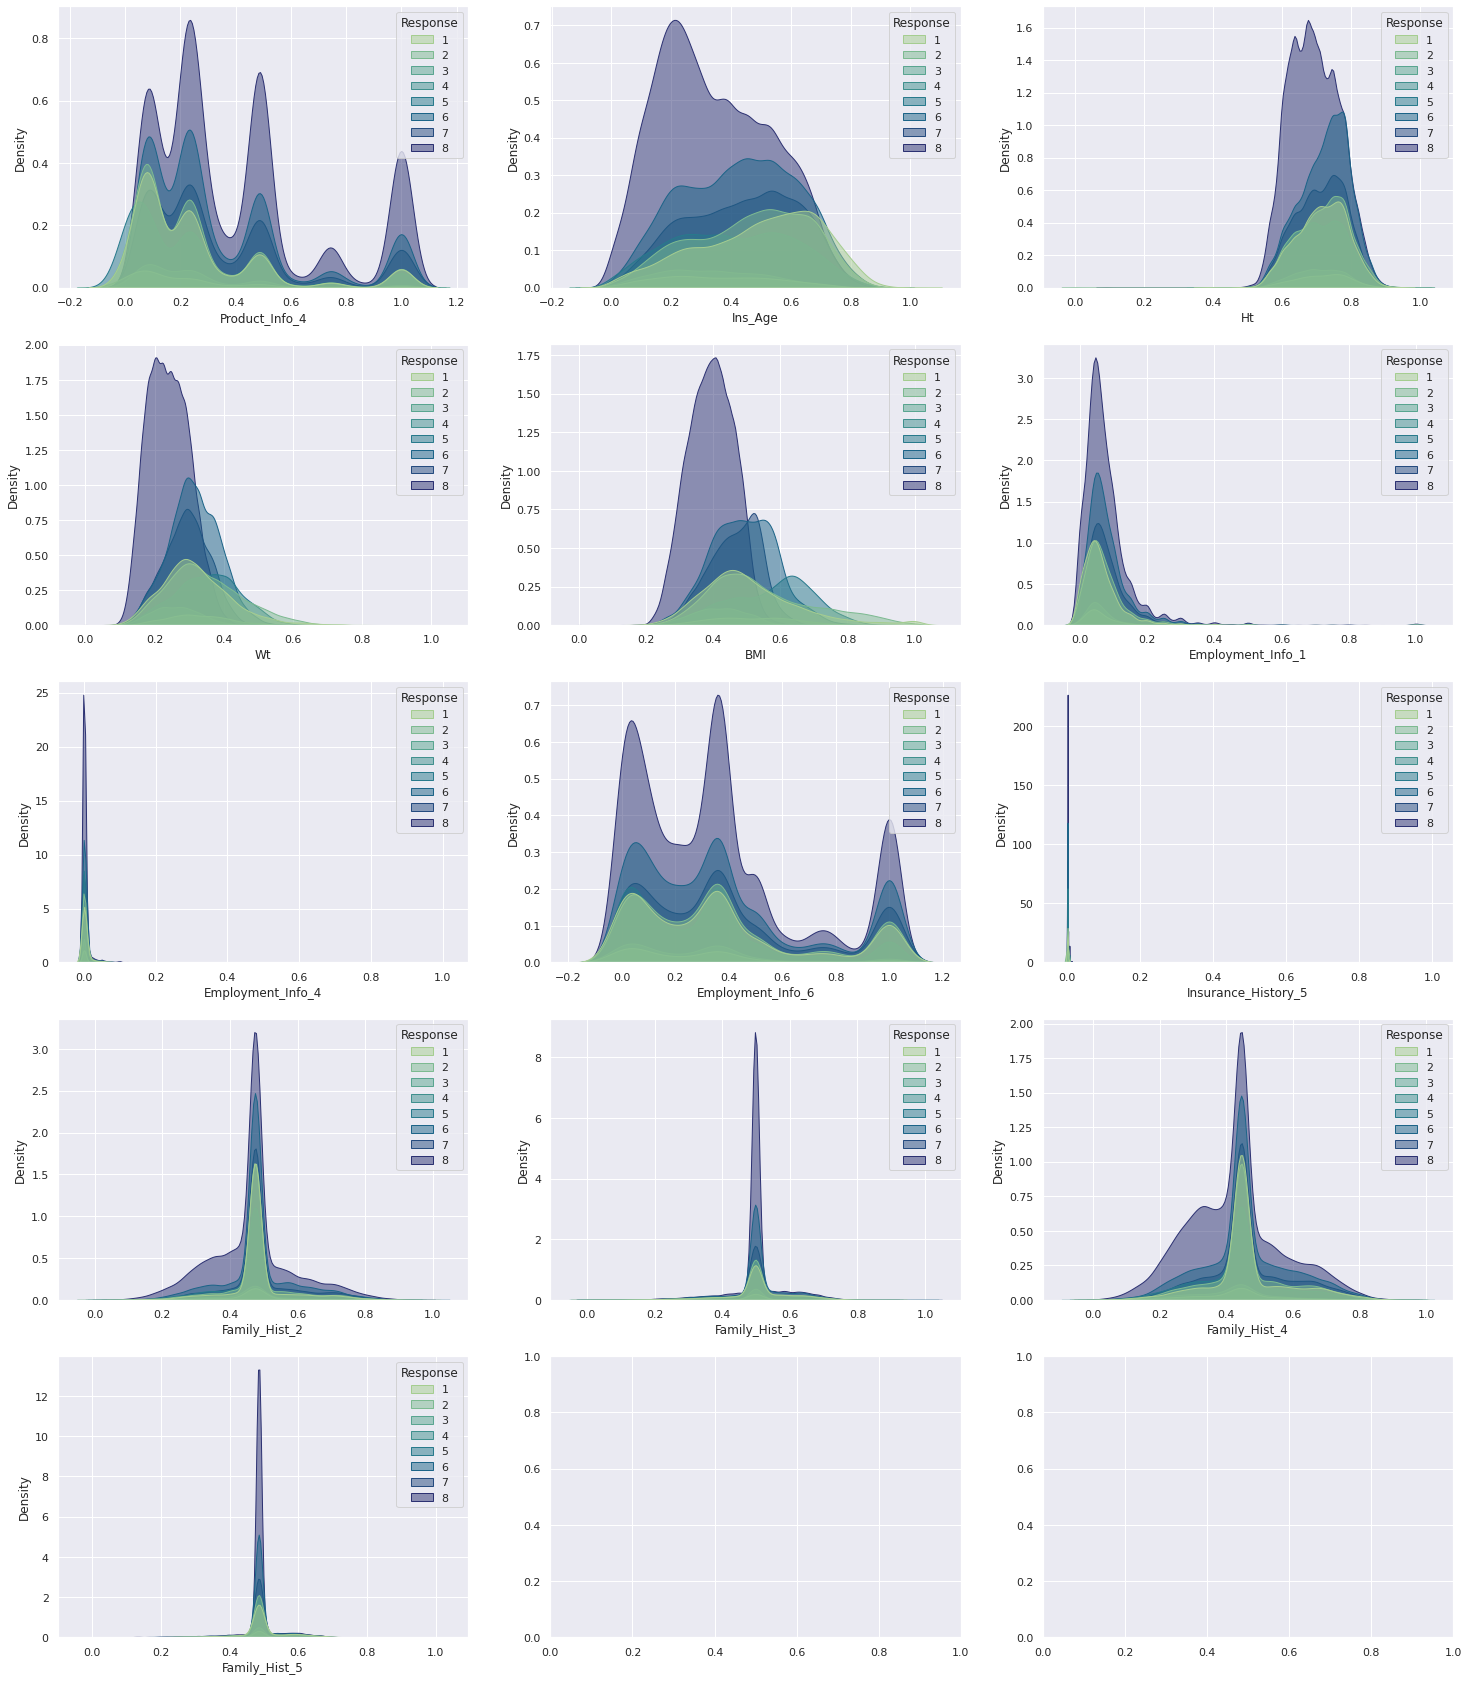

In [73]:
#KDE for Continuous Variables

# Set up a subplot grid.
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(25,30))

# Continous Variables
Continuous_Variables_kde = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI",
                      "Employment_Info_1", "Employment_Info_4", "Employment_Info_6",
                      "Insurance_History_5", "Family_Hist_2", "Family_Hist_3", "Family_Hist_4", "Family_Hist_5"]

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(data[Continuous_Variables_kde].columns):
    sns.kdeplot(data=data,
                x=column,
                hue="Response", fill=True, common_norm=True, palette="crest", alpha=.5,
                ax=axes[i//3,i%3]
               ) 

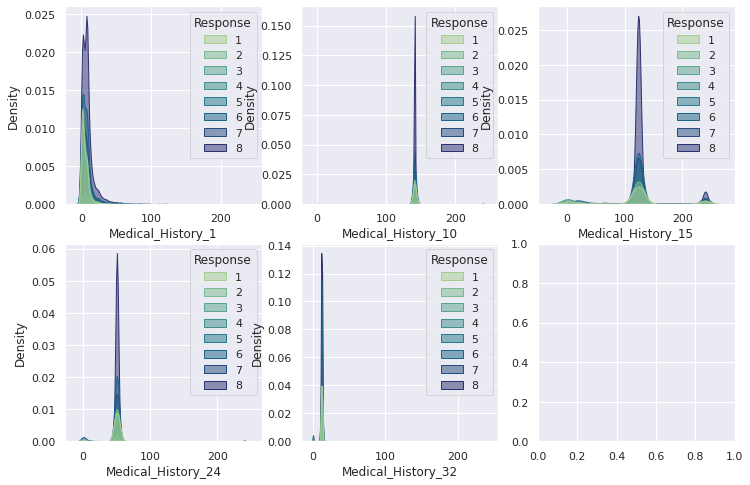

In [74]:
# Continous Variables
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(data[Discrete_Variables].columns):
    sns.kdeplot(data=data,
                x=column,
                hue="Response", fill=True, common_norm=True, palette="crest", alpha=.5,
                ax=axes[i//3,i%3]
               ) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


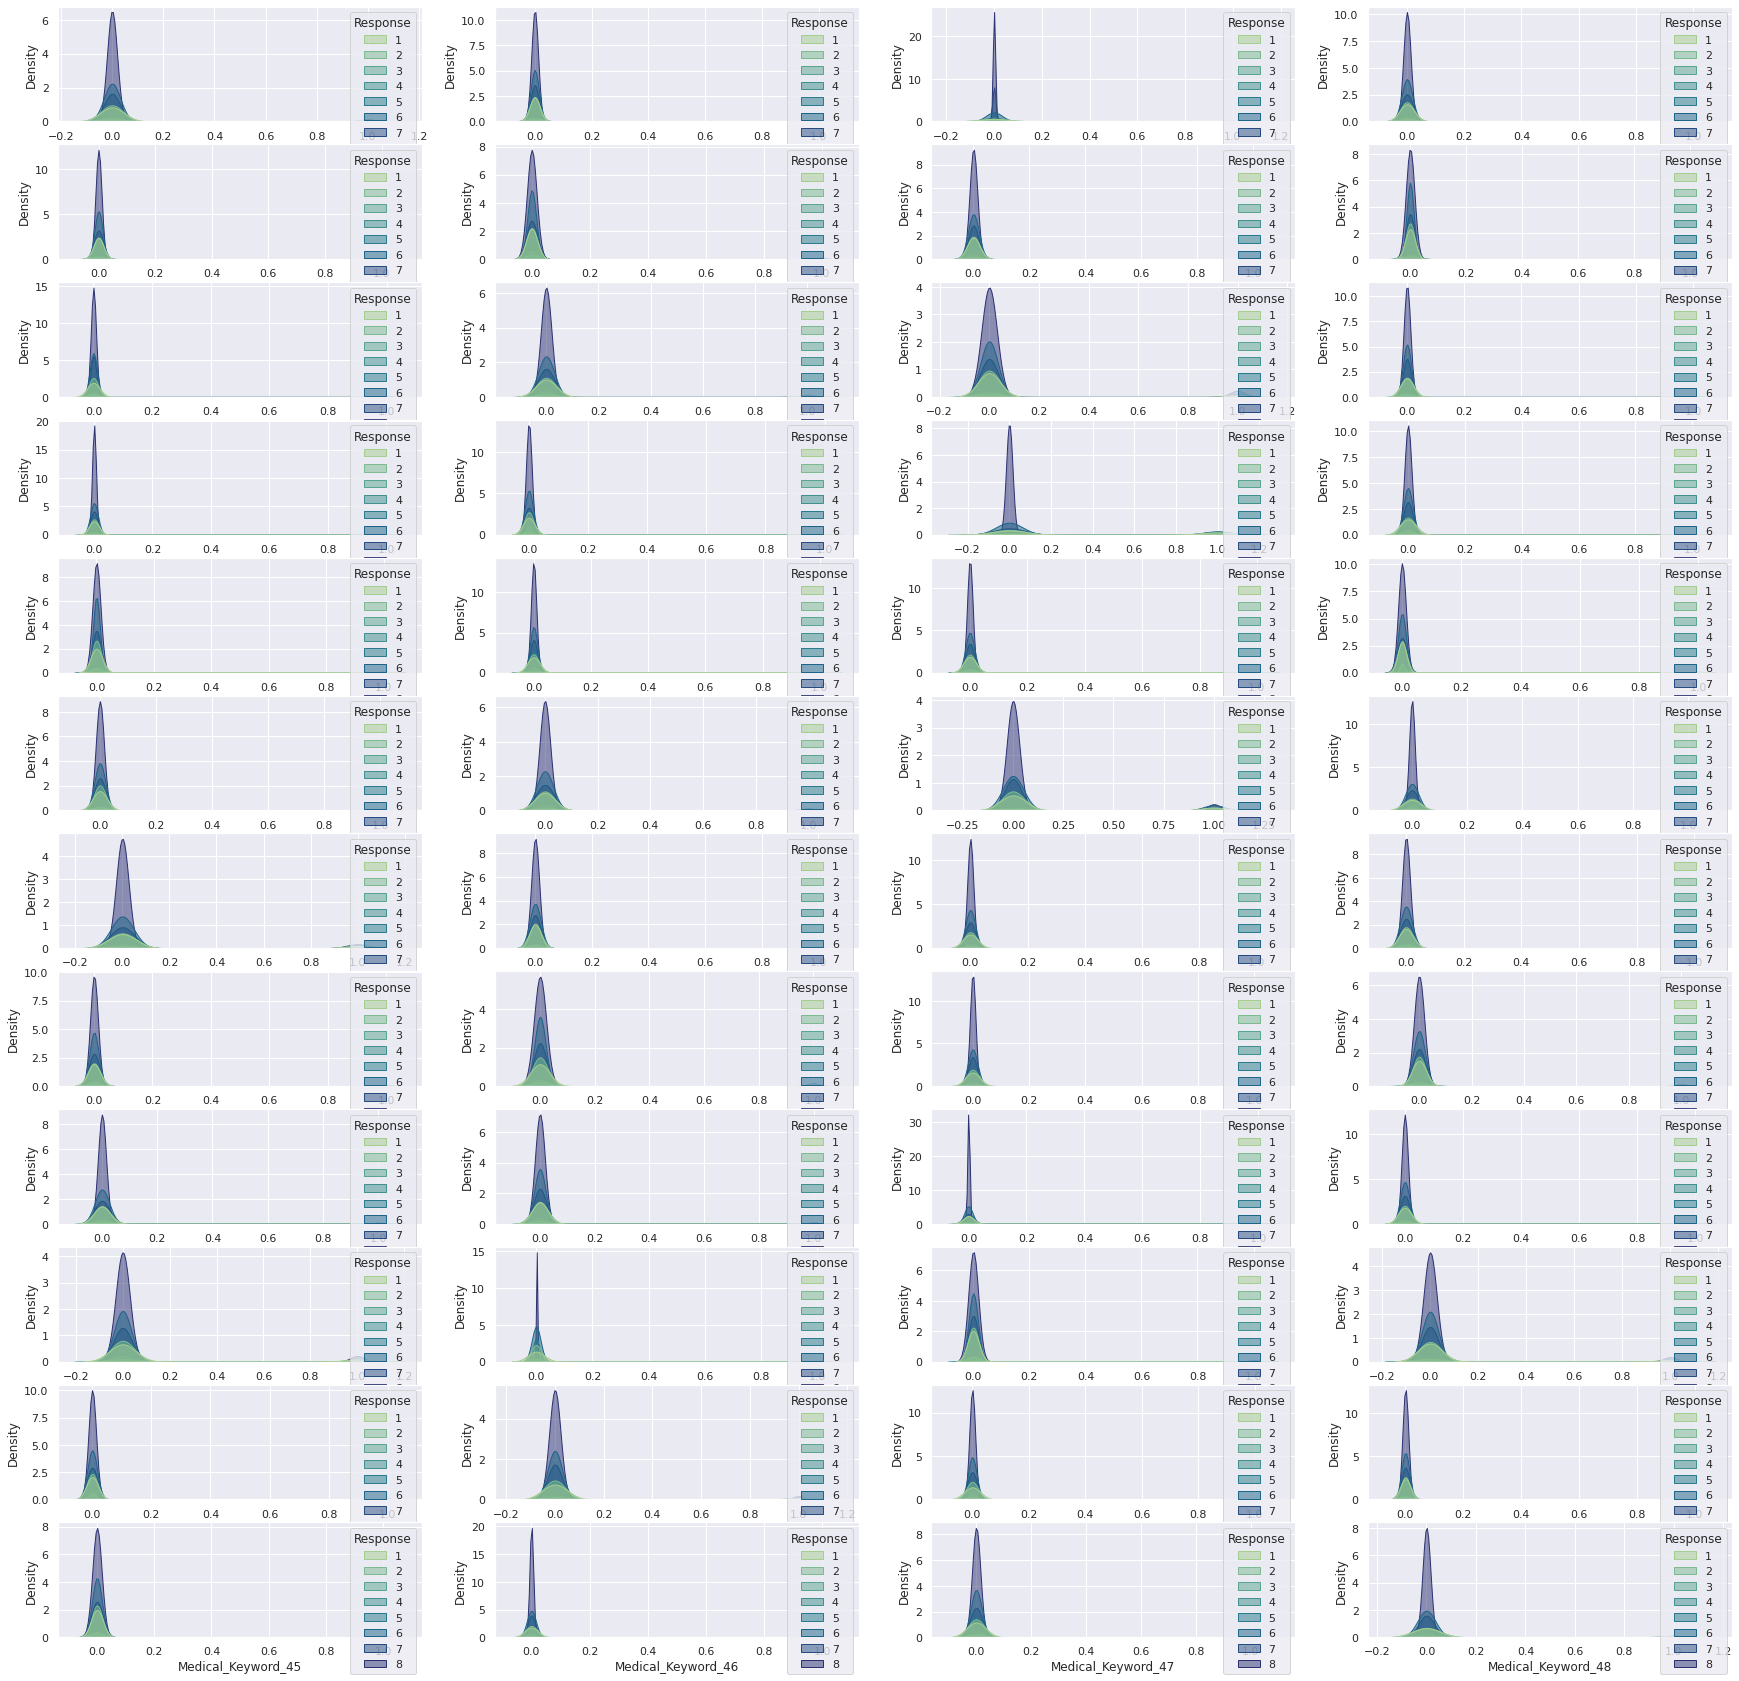

In [75]:
# Dummy_Variables distribution KDE plot

# Set up a subplot grid.
fig, axes = plt.subplots(nrows=12, ncols=4, figsize=(30,30))


# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(data[Dummy_Variables].columns):
    sns.kdeplot(data=data,
                x=column,
                hue="Response", fill=True, common_norm=True, palette="crest", alpha=.5,
                ax=axes[i//4,i%4]
               ) 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


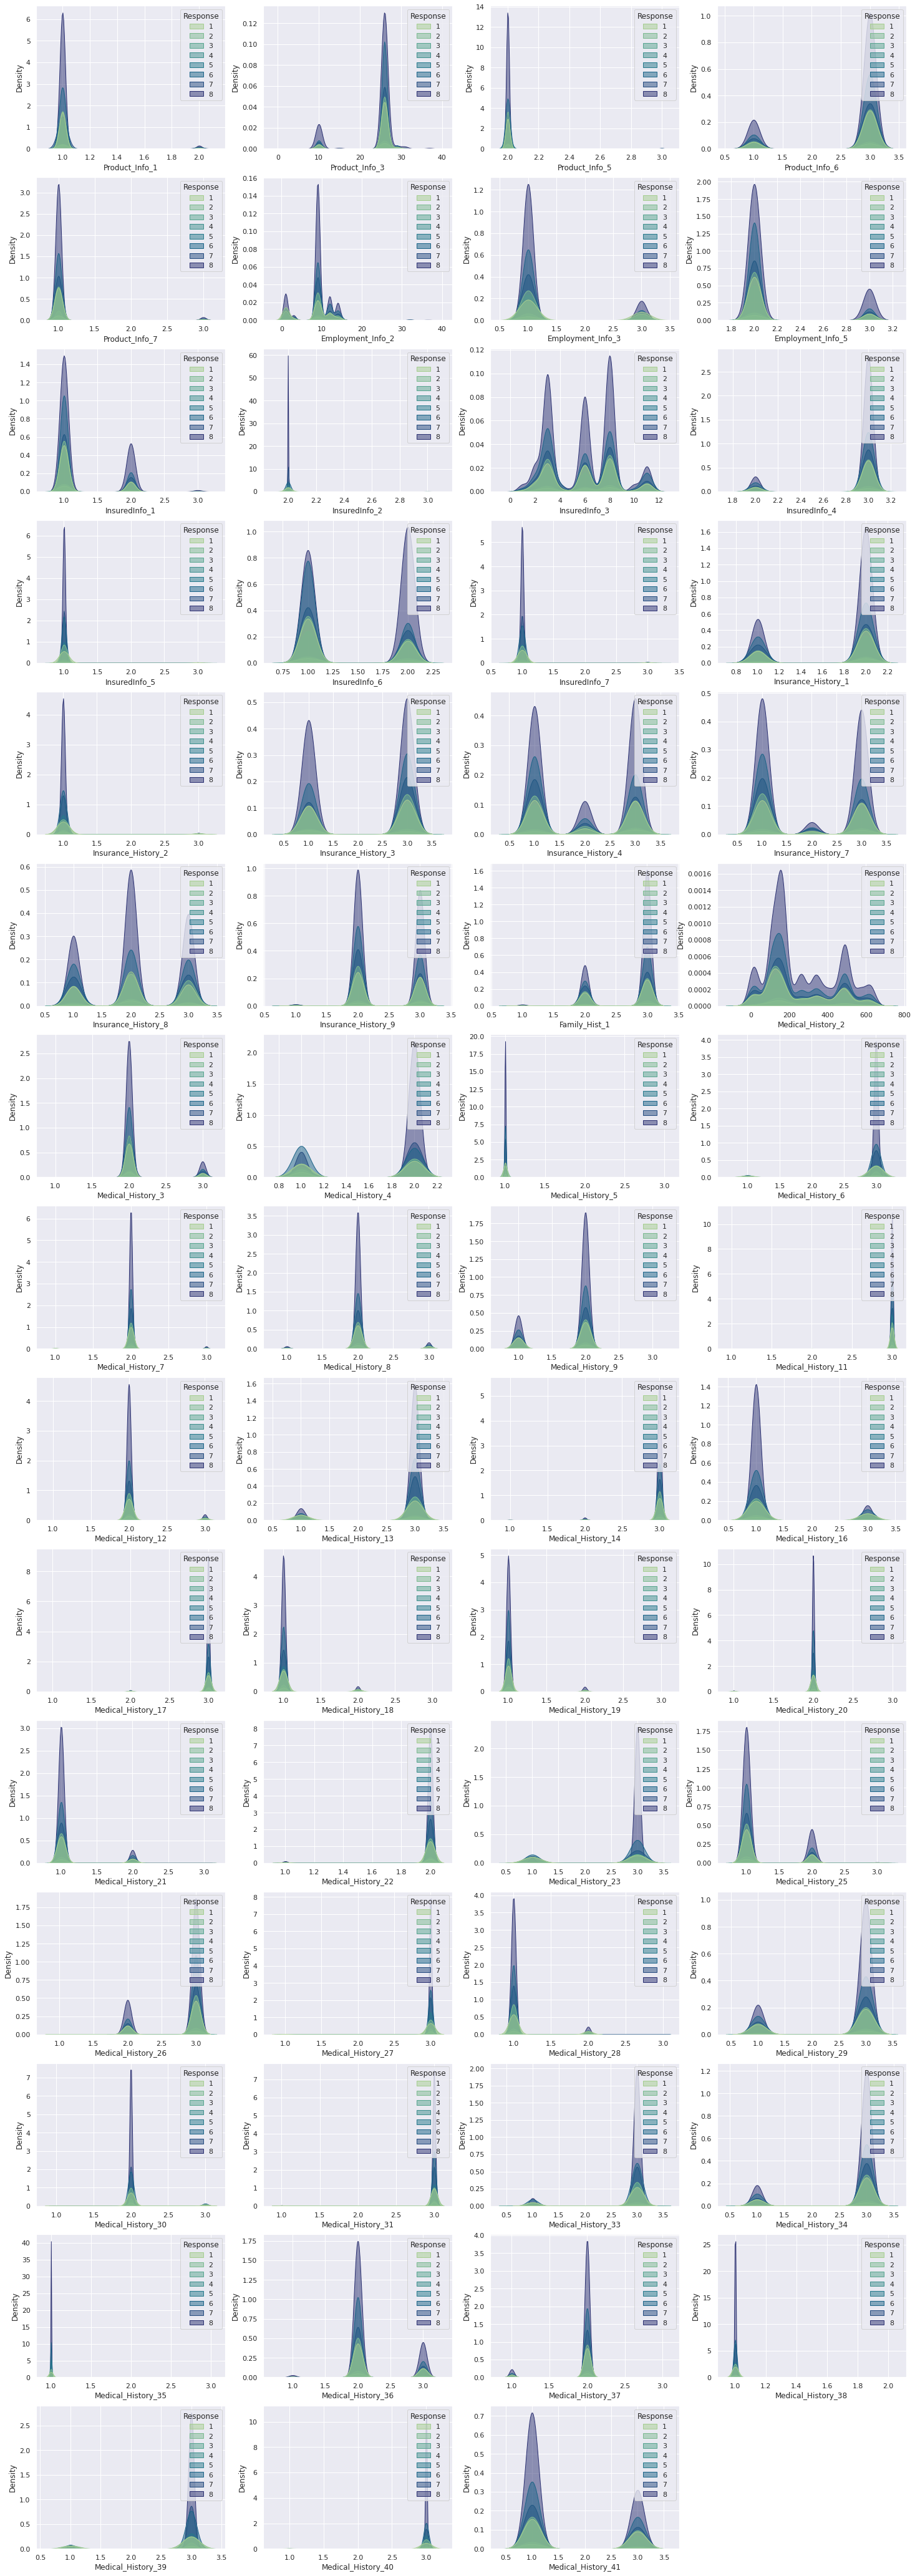

In [76]:
# Categorical_Variables -- product_info_2 has been excluded for KDE plot
fig, axes = plt.subplots(nrows=15, ncols=4, figsize=(25,75))

# Product_Info_2 has been excluded - as this has not yet been encoded into numeric values.
Catergorical_Variables_excluded_kde = ["Product_Info_1", "Product_Info_3", "Product_Info_5", "Product_Info_6",\
                       "Product_Info_7", "Employment_Info_2", "Employment_Info_3", "Employment_Info_5", "InsuredInfo_1",\
                       "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7",\
                       "Insurance_History_1", "Insurance_History_2", "Insurance_History_3", "Insurance_History_4", "Insurance_History_7",\
                       "Insurance_History_8", "Insurance_History_9", "Family_Hist_1", "Medical_History_2", "Medical_History_3",\
                       "Medical_History_4", "Medical_History_5", "Medical_History_6", "Medical_History_7", "Medical_History_8",\
                       "Medical_History_9", "Medical_History_11", "Medical_History_12", "Medical_History_13", "Medical_History_14",\
                       "Medical_History_16", "Medical_History_17", "Medical_History_18", "Medical_History_19", "Medical_History_20",\
                       "Medical_History_21", "Medical_History_22", "Medical_History_23", "Medical_History_25", "Medical_History_26",\
                       "Medical_History_27", "Medical_History_28", "Medical_History_29", "Medical_History_30", "Medical_History_31",\
                       "Medical_History_33", "Medical_History_34", "Medical_History_35", "Medical_History_36", "Medical_History_37",\
                       "Medical_History_38", "Medical_History_39", "Medical_History_40", "Medical_History_41"]

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(data[Catergorical_Variables_excluded_kde].columns):
    sns.kdeplot(data=data,
                x=column,
                hue="Response", fill=True, common_norm=True, palette="crest", alpha=.5,
                ax=axes[i//4,i%4]
               ) 
    
# Delete any unused sets of axes in the subplot grid.    
fig.delaxes(axes[14,3])


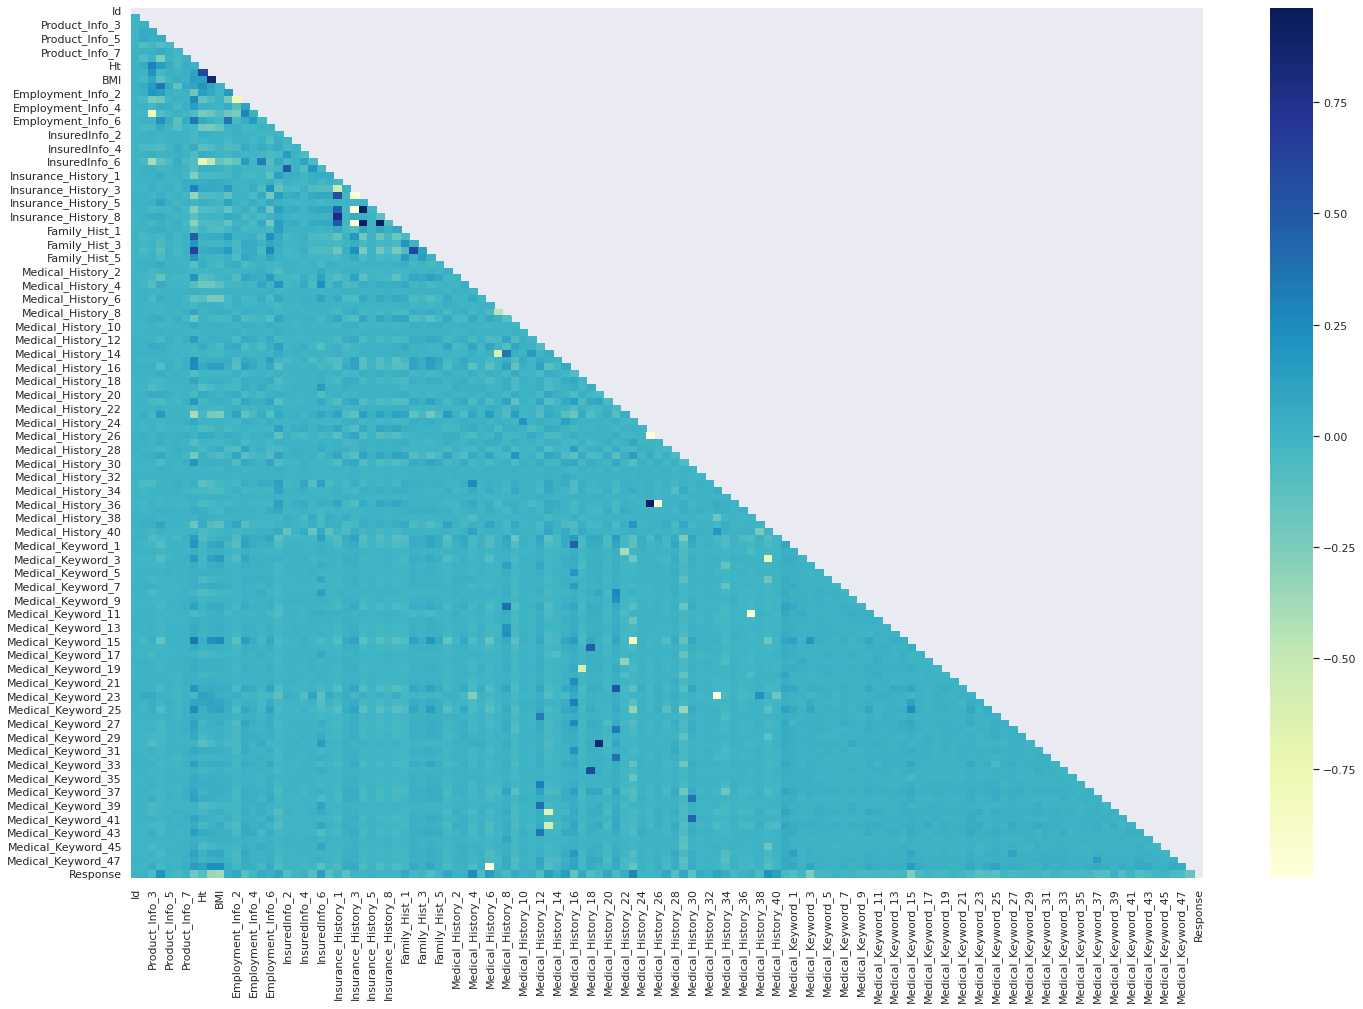

In [77]:
#Correlation matrix
correlation_matrix = data.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,16))
sns.heatmap(correlation_matrix, cmap="YlGnBu", mask = mask)
plt.show()

Medical_History_23     0.31
Medical_History_4      0.28
Product_Info_4         0.25
Medical_History_39     0.21
InsuredInfo_6          0.16
Medical_History_1      0.16
Medical_History_6      0.16
Medical_History_15     0.14
Medical_History_13     0.12
Medical_History_40     0.12
Medical_History_33     0.12
InsuredInfo_1          0.10
Insurance_History_5    0.09
Family_Hist_1          0.08
Medical_History_29     0.08
Medical_History_27     0.08
Medical_History_17     0.07
Employment_Info_5      0.07
Medical_History_20     0.07
Medical_History_32     0.07
Medical_History_9      0.07
Employment_Info_1      0.06
Medical_History_24     0.05
Medical_History_34     0.05
Employment_Info_2      0.05
Medical_History_11     0.04
Medical_History_22     0.04
Medical_History_31     0.04
Medical_History_2      0.04
Medical_History_14     0.03
Medical_History_37     0.03
InsuredInfo_4          0.03
Medical_History_3      0.02
Employment_Info_6      0.02
Medical_History_7      0.02
Insurance_History_1 

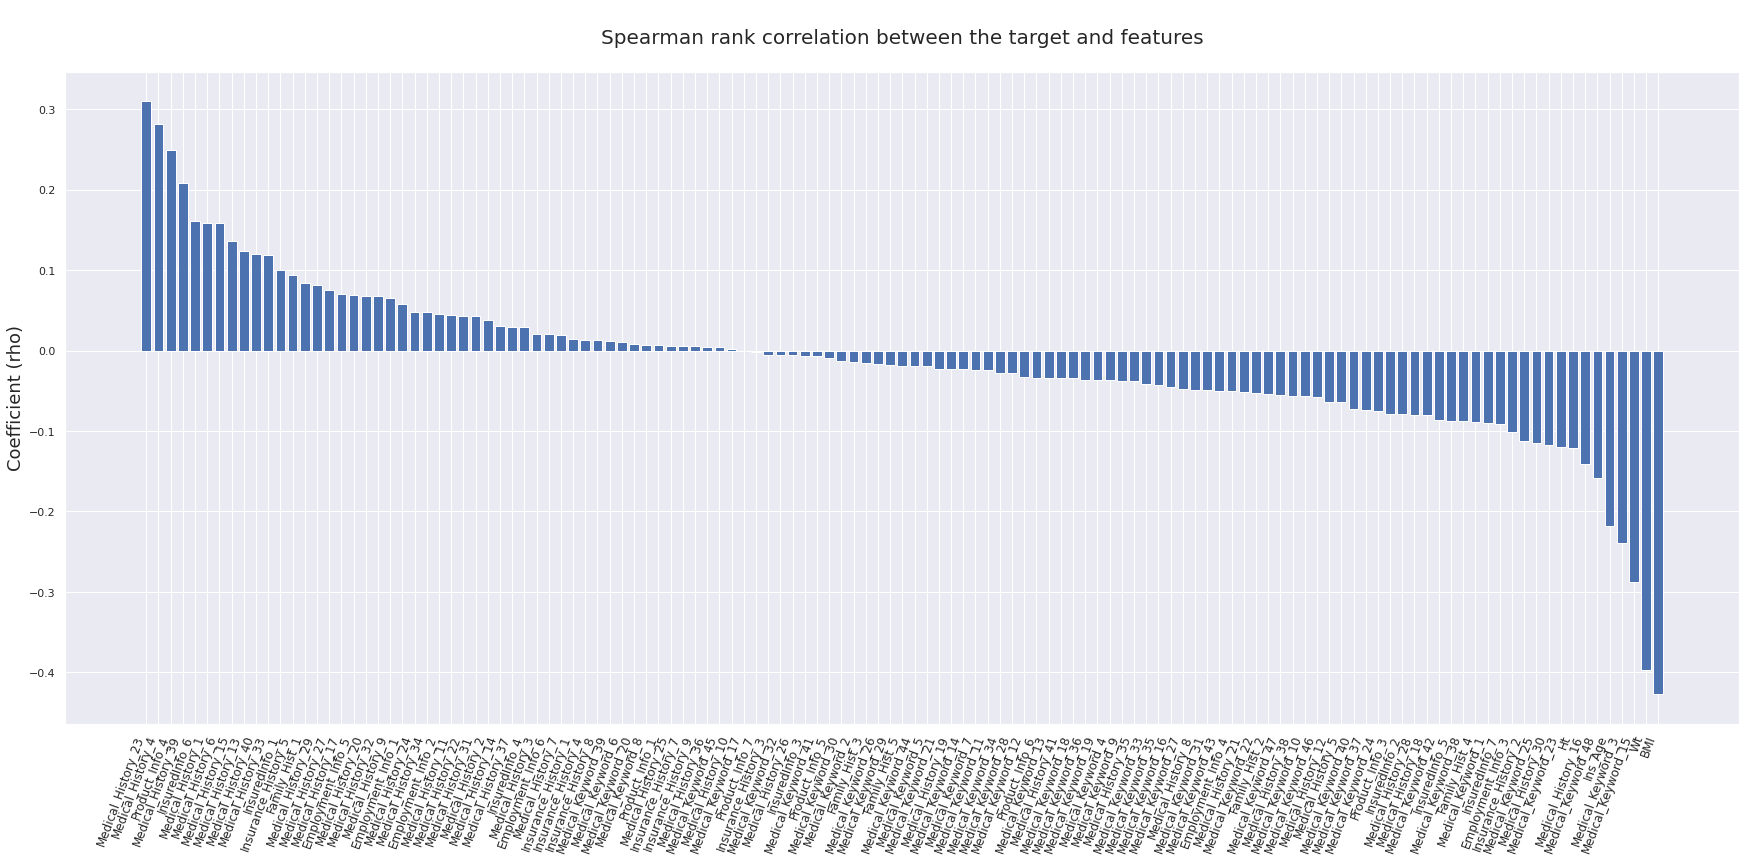

In [78]:
#Spearman Correlation without Product_info_2 column

df_corr = data.loc[:, ['Response'] + Categorical_Variables +Discrete_Variables+ Continuous_Variables+Dummy_Variables].corr(method = "spearman")
# Create DF to only include correlations with response for all features
df_corr=pd.DataFrame(df_corr.loc['Response',:])

# sort DF
df_corr.sort_values(by='Response', inplace=True, ascending=False)
# Drop Response
df_corr.drop(['Response'], inplace=True)

# Print correlations
print(df_corr['Response'].round(2))

# Plot correlations
sns.set()
plt.subplots(figsize=(30,12))
plt.bar(df_corr.index, df_corr['Response'])
plt.xticks(rotation=70, fontsize=12, horizontalalignment='right')
plt.ylabel('Coefficient (rho)', fontsize=18)
plt.title('\nSpearman rank correlation between the target and features\n', fontsize=20);

The graph below shows the uneven distribution of classes in the target variable justifying the fact that this is a highly imbalanced dataset

Text(0, 0.5, 'Number of applicants')

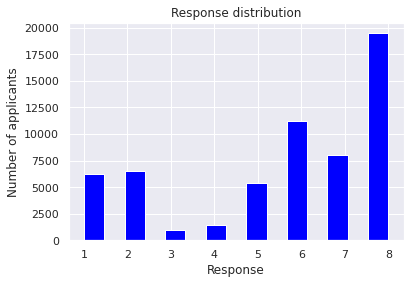

In [79]:
#Plotting class distribution
plt.hist(data['Response'], bins=15, color = 'blue')
plt.title('Response distribution')
plt.xlabel('Response')
plt.ylabel('Number of applicants')

In [80]:
#Dummy encoding Product_Info_2
data = pd.get_dummies(data)

In [81]:
#Separating response variable and data
X = data.loc[:, data.columns != 'Response']
y = data['Response']
print(X)

          Id  Product_Info_1  Product_Info_3  Product_Info_4  Product_Info_5  \
0          2               1              10        0.076923               2   
1          5               1              26        0.076923               2   
2          6               1              26        0.076923               2   
3          7               1              10        0.487179               2   
4          8               1              26        0.230769               2   
...      ...             ...             ...             ...             ...   
59376  79142               1              10        0.230769               2   
59377  79143               1              26        0.230769               2   
59378  79144               1              26        0.076923               2   
59379  79145               1              10        0.230769               2   
59380  79146               1              26        0.076923               2   

       Product_Info_6  Product_Info_7  

In [82]:
#Splitting the data into train and
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [83]:
#Class balancing
from collections import Counter
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)
print(Counter(y_over))

Counter({1: 13004, 2: 13004, 5: 13004, 7: 13004, 8: 13004, 6: 13004, 4: 13004, 3: 13004})


PCA or multi collinearity analysis is not used finally because they do not go well with the model 

In [99]:
#pca
X_over_pca =X_over.copy()
from sklearn.decomposition import PCA
pca = PCA(0.99)
principalComponets = pca.fit_transform(X_over_pca)
principalDf = pd.DataFrame(data = principalComponets)

Text(0.5, 1.0, 'Mutual Information Scores')

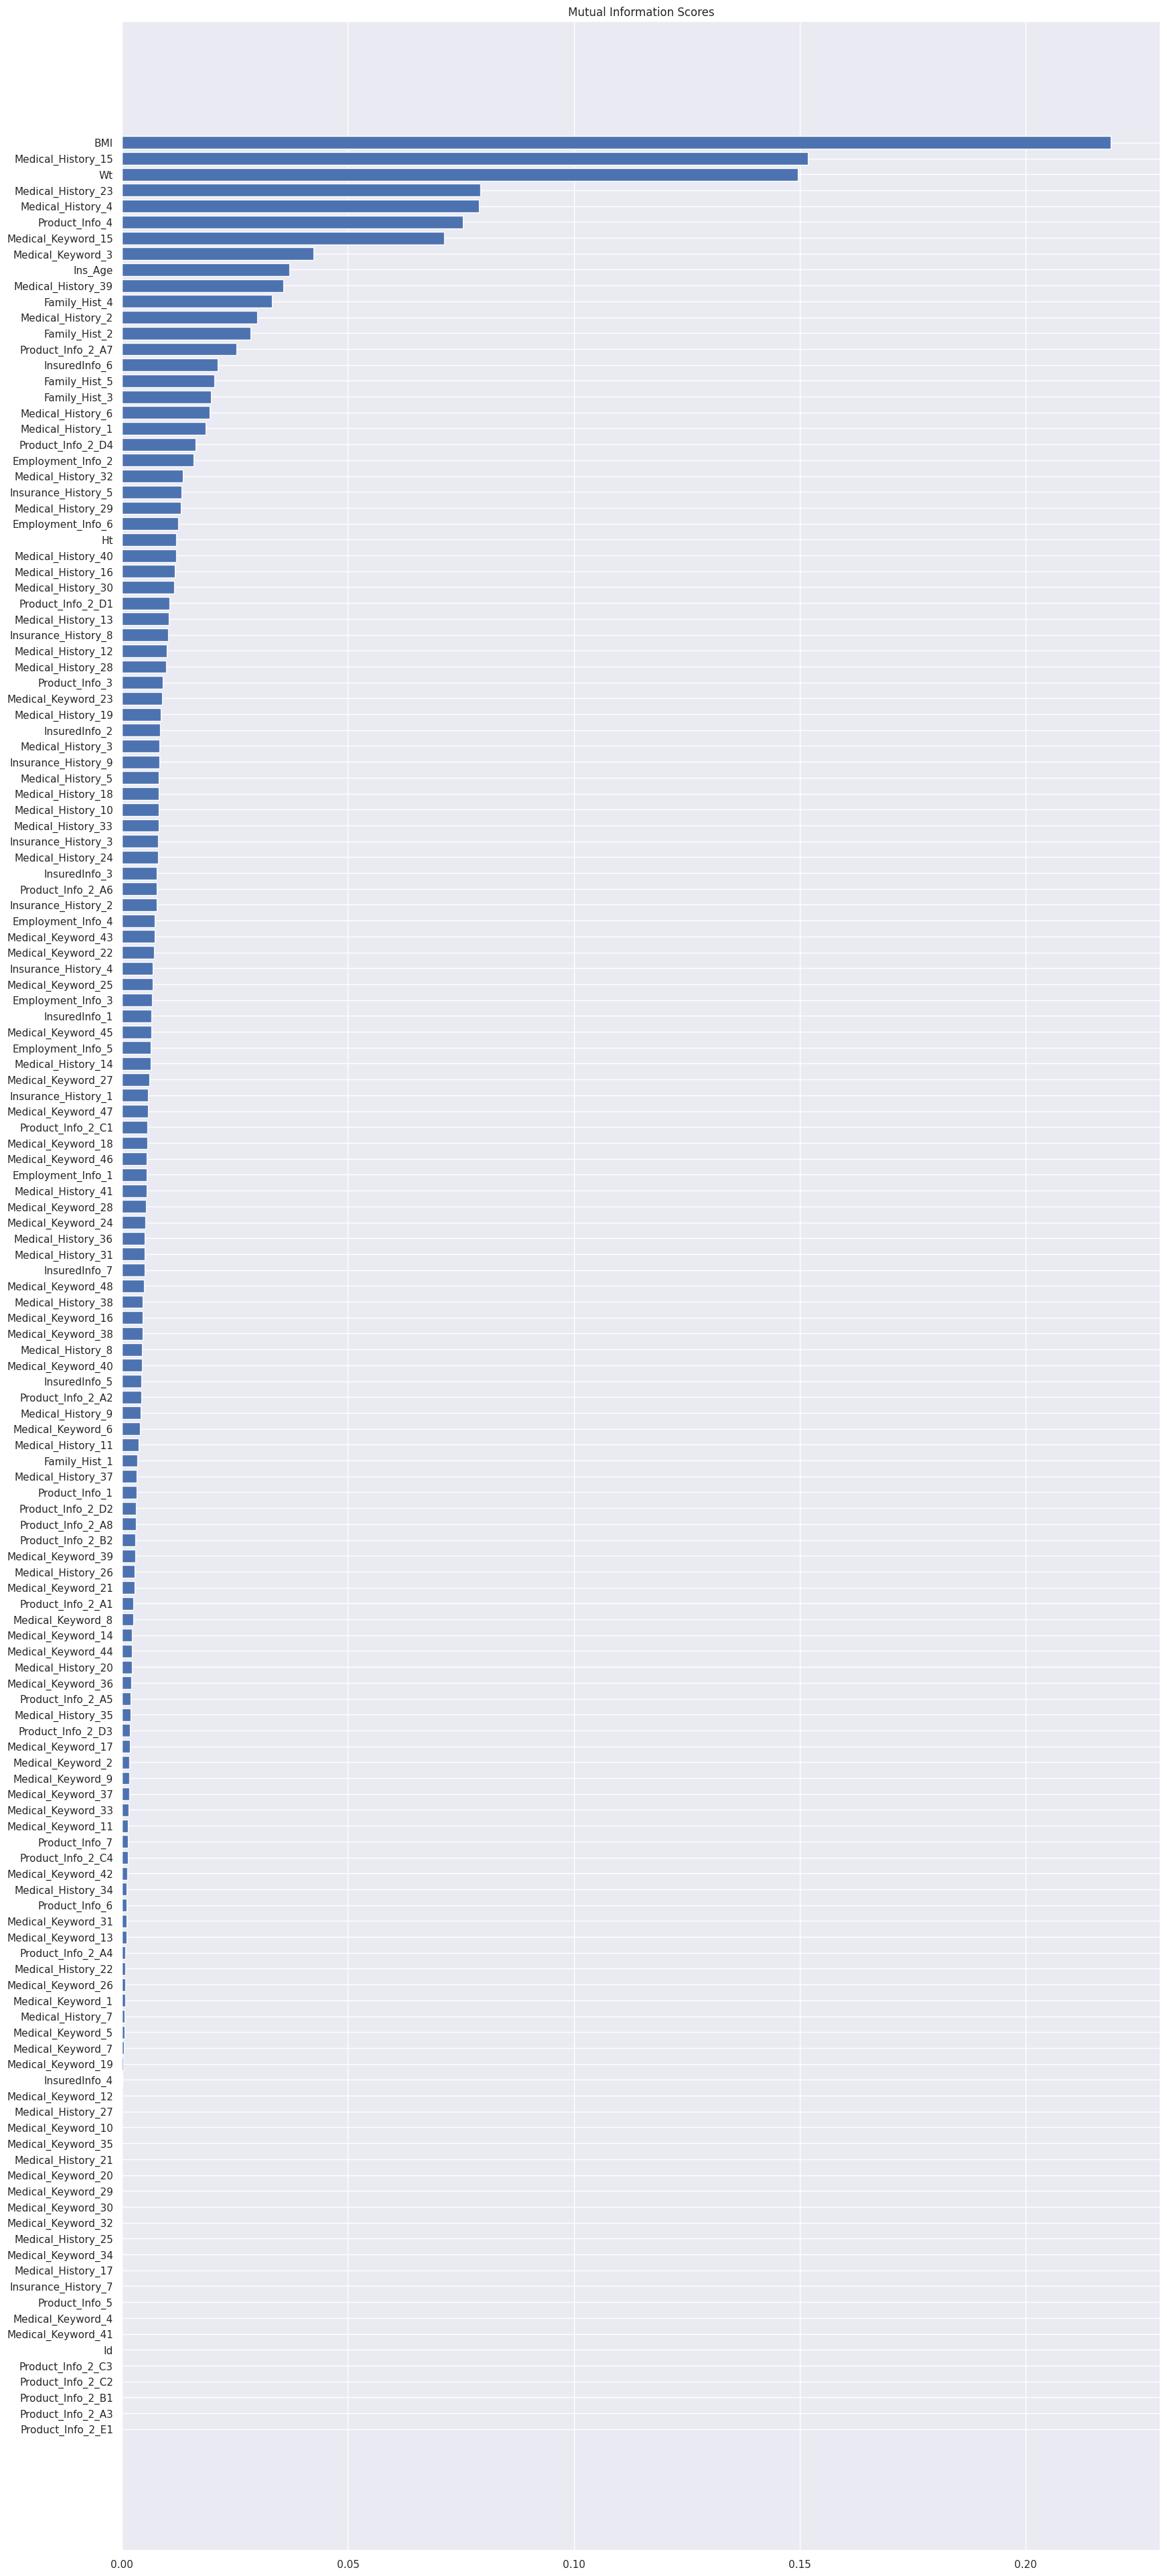

In [100]:
#multicollinearity analysis
from sklearn.feature_selection import mutual_info_classif
    
mi_scores = mutual_info_classif(X_train, y_train)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_train.columns)
mi_scores = mi_scores.sort_values(ascending=False)
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
plt.figure(dpi=100, figsize=(20,50))
plt.barh(width, scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")

In [84]:
#Scaling of all the features in the dataset
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()
Scaler.fit(X_over)

scale_X_train = Scaler.transform(X_over)
scale_X_test = Scaler.transform(X_test)

In [85]:
#Random Forest model
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"{col}" for col in (X.columns)]
forest = RandomForestClassifier(random_state=0)
forest.fit(scale_X_train, y_over)

RandomForestClassifier(random_state=0)

In [86]:
import time
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.195 seconds


Text(0.5, 1.0, 'Feature importance')

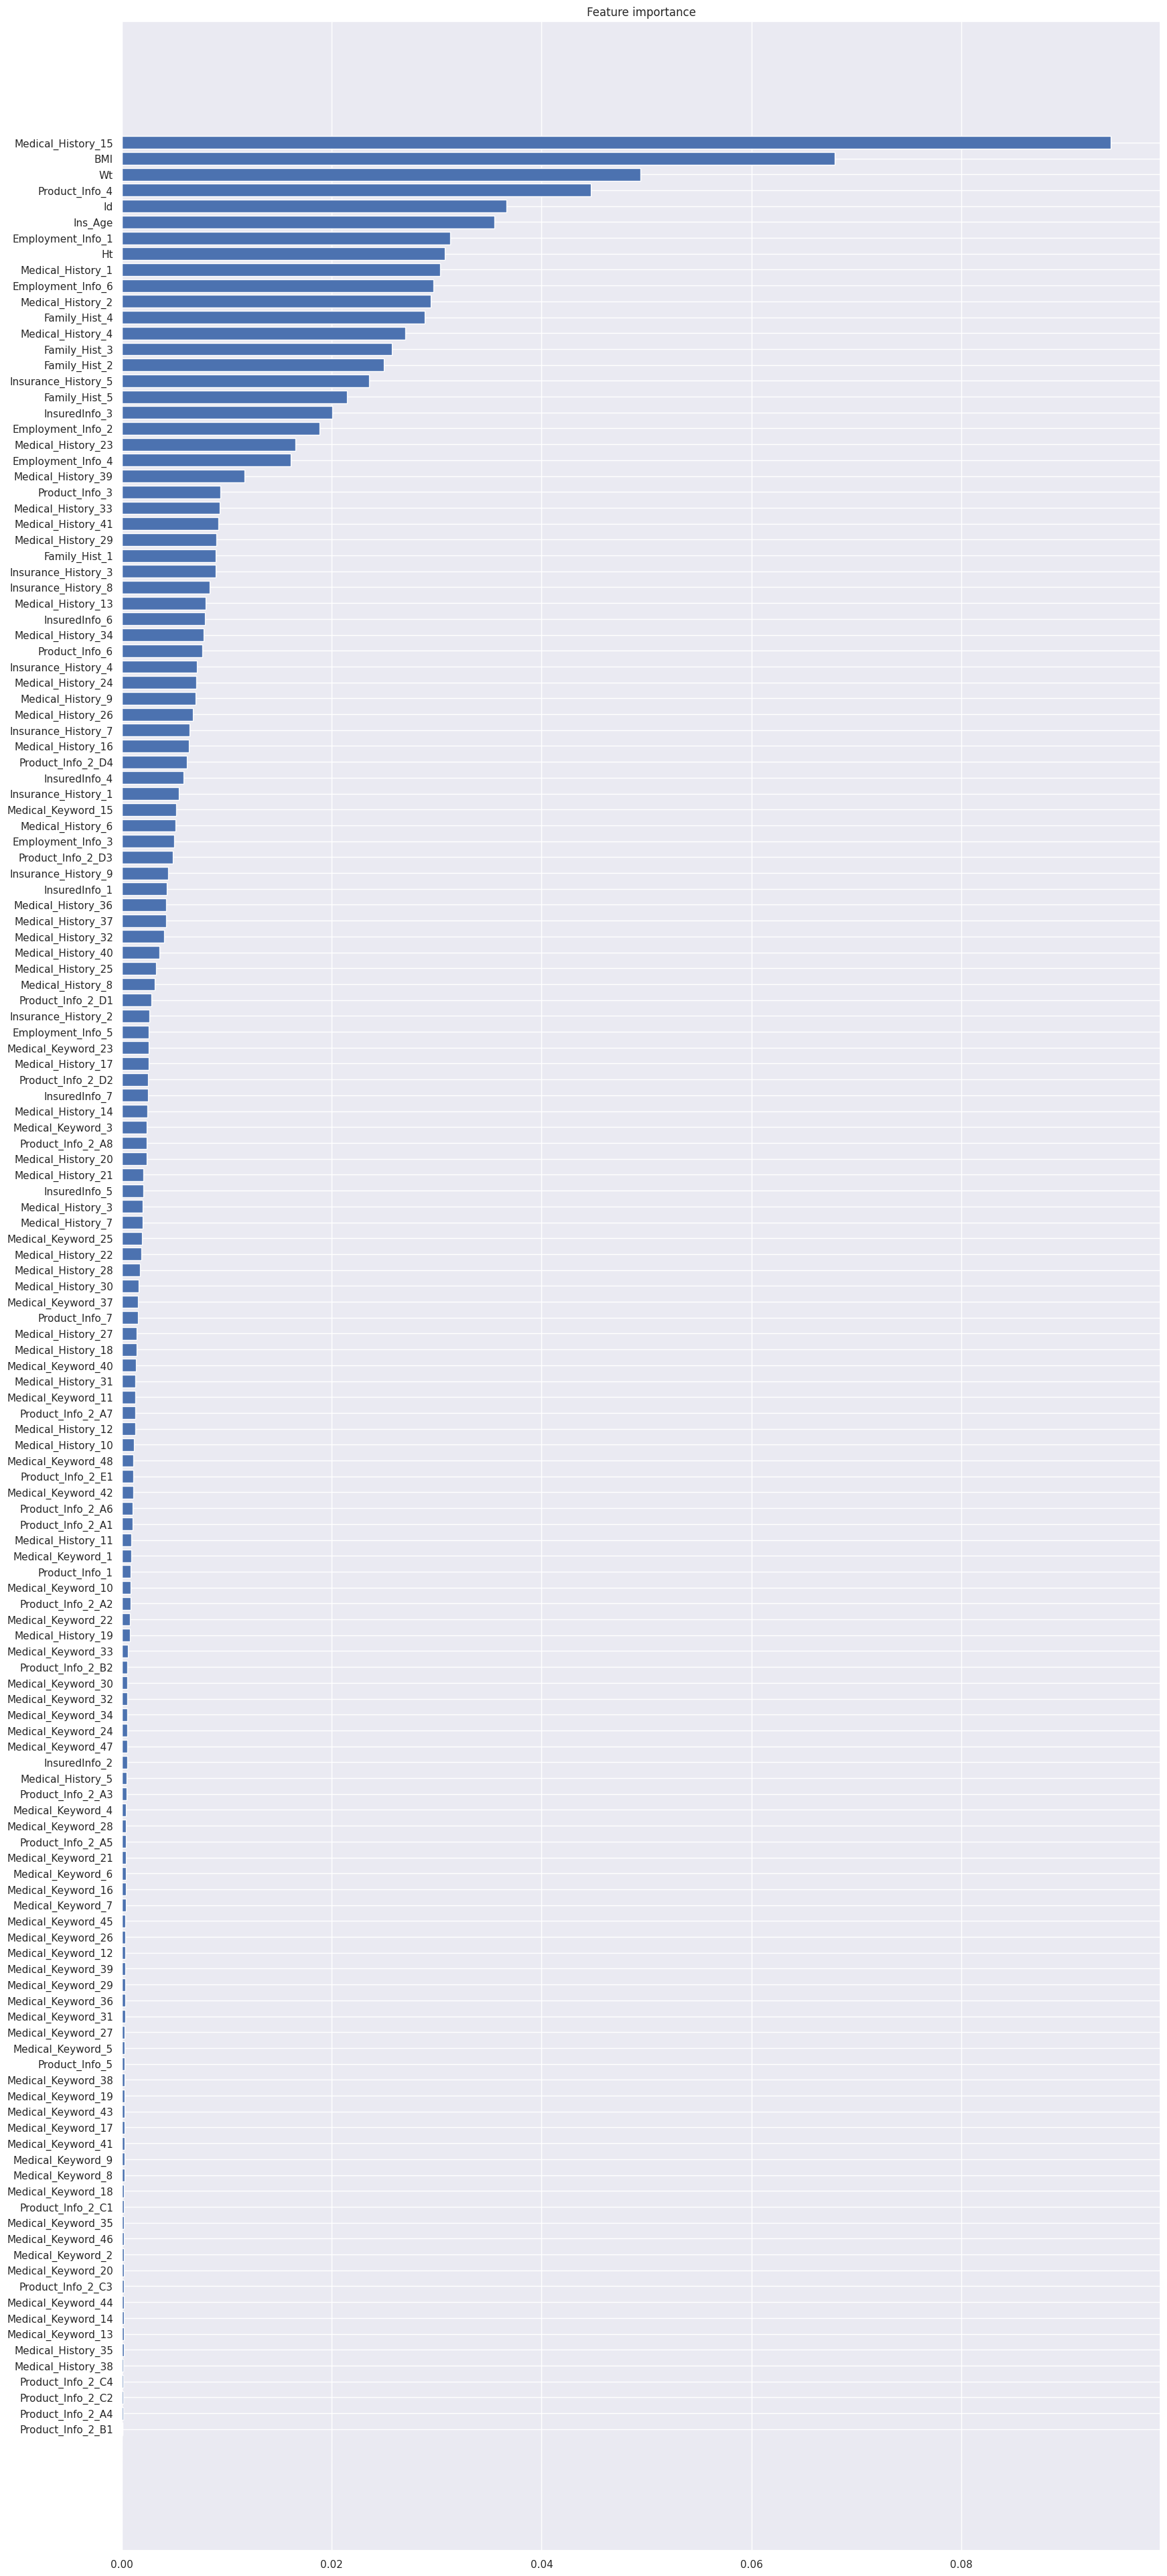

In [87]:
forest_importances = pd.Series(importances, index=feature_names)
scores = forest_importances.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
plt.figure(dpi=100, figsize=(20,50))
plt.barh(width, scores)
plt.yticks(width, ticks)
plt.title("Feature importance")

In [88]:
print(scores)

Product_Info_2_B1      0.000031
Product_Info_2_A4      0.000084
Product_Info_2_C2      0.000095
Product_Info_2_C4      0.000132
Medical_History_38     0.000139
Medical_History_35     0.000148
Medical_Keyword_13     0.000168
Medical_Keyword_14     0.000179
Medical_Keyword_44     0.000181
Product_Info_2_C3      0.000194
Medical_Keyword_20     0.000195
Medical_Keyword_2      0.000198
Medical_Keyword_46     0.000199
Medical_Keyword_35     0.000204
Product_Info_2_C1      0.000204
Medical_Keyword_18     0.000204
Medical_Keyword_8      0.000214
Medical_Keyword_9      0.000215
Medical_Keyword_41     0.000220
Medical_Keyword_17     0.000223
Medical_Keyword_43     0.000228
Medical_Keyword_19     0.000231
Medical_Keyword_38     0.000236
Product_Info_5         0.000239
Medical_Keyword_5      0.000241
Medical_Keyword_27     0.000261
Medical_Keyword_31     0.000282
Medical_Keyword_36     0.000285
Medical_Keyword_29     0.000288
Medical_Keyword_39     0.000303
Medical_Keyword_12     0.000323
Medical_

In [89]:
columns_to_drop_RF = ['Product_Info_2_B1','Product_Info_2_C2','Product_Info_2_A4','Product_Info_2_C4','Medical_History_35','Medical_Keyword_13','Medical_History_38','Medical_Keyword_35','Medical_Keyword_46','Medical_Keyword_44','Medical_Keyword_14','Product_Info_2_C3','Product_Info_2_C1','Medical_Keyword_18','Medical_Keyword_8','Medical_Keyword_5','Medical_Keyword_2','Medical_Keyword_9','Medical_Keyword_20','Medical_Keyword_41','Medical_Keyword_17','Medical_Keyword_19','Medical_Keyword_43','Product_Info_5','Medical_Keyword_38','Medical_Keyword_27','Medical_Keyword_39','Medical_Keyword_31','Medical_Keyword_36','Medical_Keyword_29','Medical_Keyword_12','Medical_Keyword_26','Medical_Keyword_7','Medical_Keyword_6','Medical_Keyword_16','Medical_Keyword_4','Medical_Keyword_45','Medical_Keyword_28','Product_Info_2_A5','Medical_Keyword_21','InsuredInfo_2','Product_Info_2_A3','Medical_Keyword_47','Medical_History_5','Medical_Keyword_24','Medical_Keyword_32','Medical_Keyword_34','Product_Info_2_B2','Medical_Keyword_30','Medical_Keyword_33']

In [90]:
#Dropping columns from feature_importance; scaling the new dataset to be used by the model
X_random_forest_train = X_over.drop(columns_to_drop_RF, axis = 1)
X_random_forest_test = X_test.drop(columns_to_drop_RF, axis = 1)
print(X_random_forest_train.shape)
Scaler.fit(X_random_forest_train)
scale_X_train = Scaler.transform(X_random_forest_train)
scale_X_test = Scaler.transform(X_random_forest_test)

(104032, 95)


In [91]:
#Training the model and predicting results based on new X_train
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 70, criterion='gini')
forest.fit(scale_X_train, y_over)
predictions = forest.predict(scale_X_test)

In [97]:
#ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier 
model3 = ExtraTreesClassifier(max_depth = 30, max_features=0.6,min_samples_leaf=1)
model3.fit(scale_X_train, np.ravel(y_over))
y_pred12 = model3.predict(scale_X_test)


In [93]:
#Random Forest Classifier classification report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report')
print(classification_report(y_test,predictions))
print("Confusion Report")
print(confusion_matrix(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           1       0.35      0.19      0.25      2071
           2       0.39      0.22      0.28      2146
           3       0.41      0.52      0.46       332
           4       0.45      0.69      0.54       451
           5       0.55      0.55      0.55      1816
           6       0.48      0.46      0.47      3715
           7       0.42      0.40      0.41      2580
           8       0.68      0.87      0.76      6485

    accuracy                           0.55     19596
   macro avg       0.47      0.49      0.47     19596
weighted avg       0.52      0.55      0.52     19596

Confusion Report
[[ 400  293   71   87  199  330  236  455]
 [ 259  473   64   51  257  384  242  416]
 [  18    9  174   84   14   15    8   10]
 [   6    2   58  309    1   25    7   43]
 [  79  186   25    4 1002  262   95  163]
 [ 219  181   28  105  271 1723  446  742]
 [ 108   41    5   22   47  496 1026  835]
 [  41   

In [98]:
#ExtraTreesClassifier classification report
print('Classification Report')
print(classification_report(y_test, y_pred12))
print("Confusion Report")
print(confusion_matrix(y_test, y_pred12))

Classification Report
              precision    recall  f1-score   support

           1       0.39      0.21      0.27      2071
           2       0.40      0.24      0.30      2146
           3       0.43      0.54      0.48       332
           4       0.49      0.64      0.56       451
           5       0.56      0.52      0.54      1816
           6       0.51      0.51      0.51      3715
           7       0.43      0.45      0.44      2580
           8       0.69      0.86      0.76      6485

    accuracy                           0.56     19596
   macro avg       0.49      0.50      0.48     19596
weighted avg       0.54      0.56      0.54     19596

Confusion Report
[[ 425  309   59   78  171  344  250  435]
 [ 268  512   56   46  220  390  259  395]
 [  14   12  178   78   16   15    9   10]
 [  12    2   64  290    2   28   11   42]
 [  93  195   13    7  946  290  100  172]
 [ 155  182   31   47  252 1893  454  701]
 [  77   49    7   19   53  428 1149  798]
 [  47   

In [51]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()
Scaler.fit(X_over)

scale_X_train = Scaler.transform(X_over)
scale_X_test = Scaler.transform(X_test)

In [58]:
#For Logistic Regression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(scale_X_train, y_over)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(scale_X_train)
X_new_test = model.transform(scale_X_test)
X_new.shape

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


(104032, 108)

In [59]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_new, y_over)
predictions1= clf.predict(X_new_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report')
print(classification_report(y_test,predictions1))
print("Confusion Report")
print(confusion_matrix(y_test,predictions1))

Classification Report
              precision    recall  f1-score   support

           1       0.37      0.28      0.32      2071
           2       0.33      0.20      0.25      2146
           3       0.32      0.46      0.38       332
           4       0.39      0.60      0.47       451
           5       0.45      0.38      0.41      1816
           6       0.43      0.39      0.41      3715
           7       0.41      0.32      0.36      2580
           8       0.64      0.86      0.74      6485

    accuracy                           0.51     19596
   macro avg       0.42      0.44      0.42     19596
weighted avg       0.48      0.51      0.48     19596

Confusion Report
[[ 570  277   55   68  192  307  184  418]
 [ 294  439   82   53  314  363  196  405]
 [  20   19  153   77   11   37    2   13]
 [  16    2   80  270    1   30    7   45]
 [ 132  212   43    8  697  323  132  269]
 [ 295  266   60  157  223 1439  365  910]
 [ 127   63    6   33   87  424  816 1024]
 [  79   

In [61]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

forest1 = DecisionTreeClassifier()
forest1.fit(scale_X_train, y_over)
predictions2 = forest1.predict(scale_X_test)

In [62]:
print('Classification Report')
print(classification_report(y_test,predictions2))
print("Confusion Report")
print(confusion_matrix(y_test,predictions2))

Classification Report
              precision    recall  f1-score   support

           1       0.20      0.22      0.21      2071
           2       0.21      0.23      0.22      2146
           3       0.27      0.42      0.33       332
           4       0.40      0.49      0.44       451
           5       0.36      0.39      0.38      1816
           6       0.38      0.35      0.37      3715
           7       0.28      0.31      0.30      2580
           8       0.69      0.61      0.65      6485

    accuracy                           0.41     19596
   macro avg       0.35      0.38      0.36     19596
weighted avg       0.43      0.41      0.42     19596

Confusion Report
[[ 447  375   88   67  220  326  243  305]
 [ 368  485   76   49  285  356  252  275]
 [  42   45  139   63   14   14    8    7]
 [  50   21   83  223    4   29   16   25]
 [ 232  335   40    6  717  256  111  119]
 [ 434  444   62   55  387 1297  530  506]
 [ 281  243   14   42  153  479  809  559]
 [ 373  3